## Visualization of corpus callosum
Create visualization of corpus callosum values and SC extracted values, dividing it by center and DX label.

View the differences using boxplots and regression plots. Relate everything to center, DX, SDMT, EDSS.

In [21]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import glob
import statsmodels.api as sm
import statsmodels.formula.api as smf
from functools import reduce

In [22]:
# Load the csv

csv_cc = f'/home/extop/GERARD/DATA/MAGNIMS2021/cc.csv'
csv_hemis = f'/home/extop/GERARD/DATA/MAGNIMS2021/graph_values/graph_G_SC.csv'
csv_hemis_nodes = f'/home/extop/GERARD/DATA/MAGNIMS2021/graph_values/graph_nodes_SC.csv'
csv_total = '/home/extop/GERARD/DATA/MAGNIMS2021/data_total.csv'

df_cc = pd.read_csv(csv_cc)
df_hemis = pd.read_csv(csv_hemis)
df_hemis_nodes = pd.read_csv(csv_hemis_nodes)
df_total = pd.read_csv(csv_total)

In [23]:
# merge results and total
data_frames = [df_total, df_cc]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=["SubjID", "CENTER"]), data_frames)

print(df_merged["CENTER"].describe())
df_merged["Full_CC"] = df_merged["CC_Posterior"] + df_merged["CC_Mid_Posterior"] + df_merged["CC_Central"] + df_merged["CC_Mid_Anterior"] + df_merged["CC_Anterior"]

count           744
unique            7
top       AMSTERDAM
freq            225
Name: CENTER, dtype: object


## CORPUS CALLOSUM

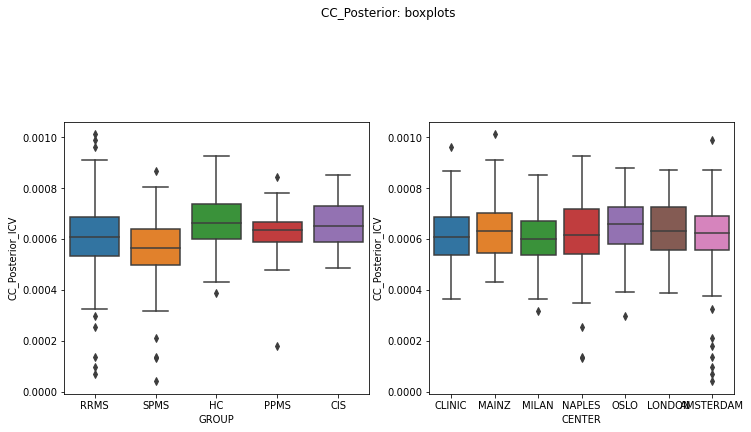

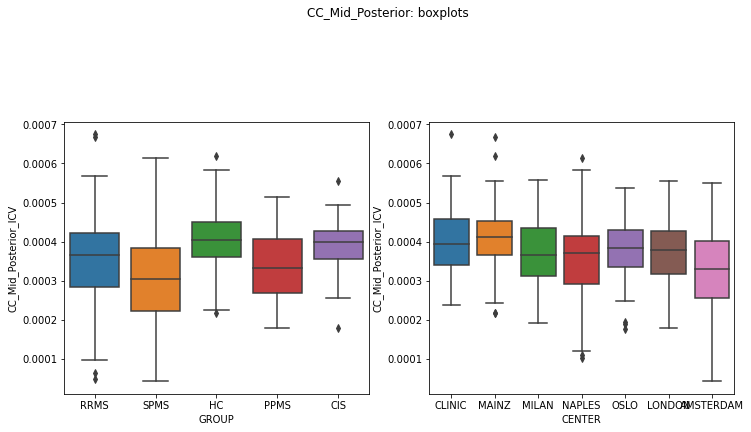

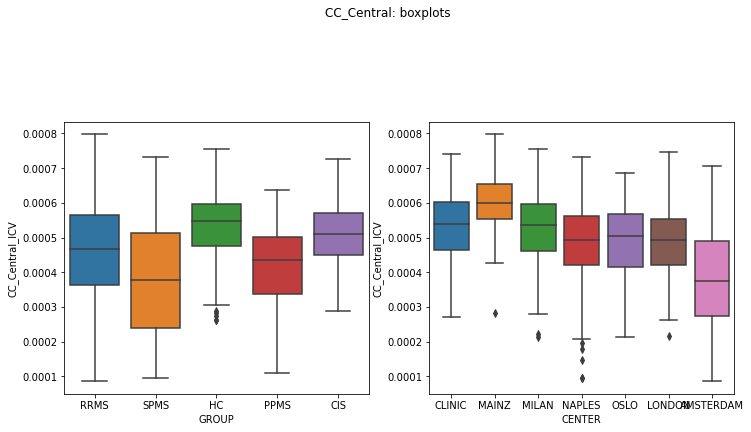

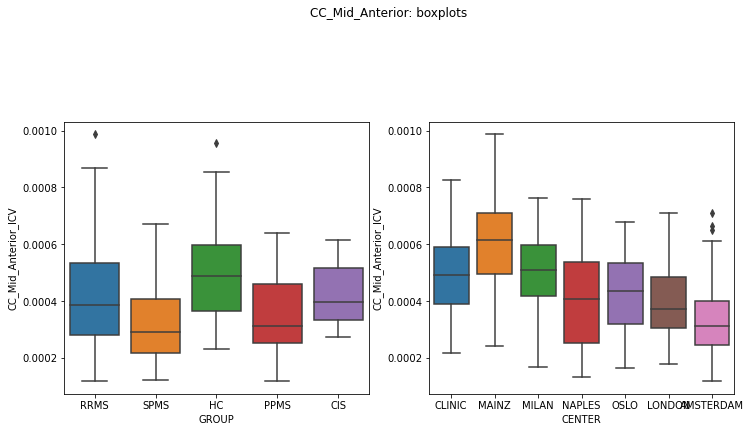

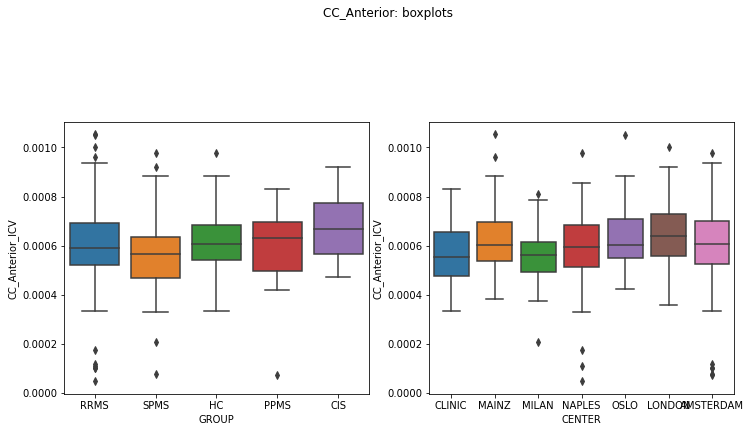

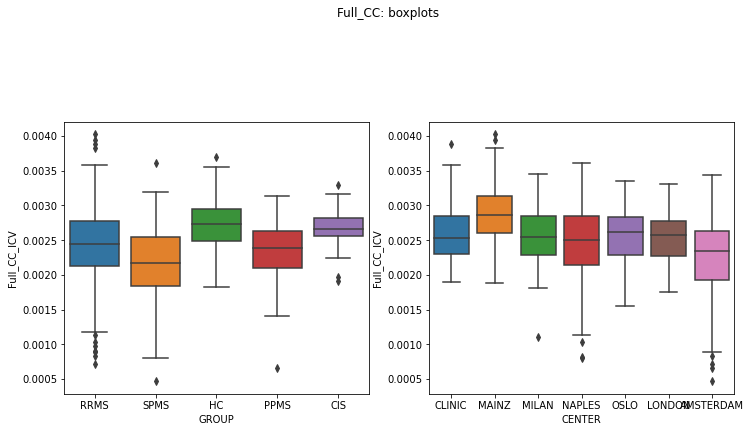

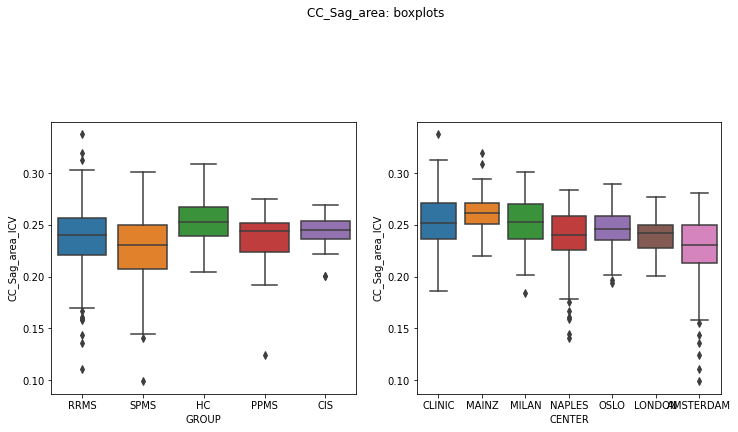

In [24]:
## Boxplots center and diagnosis
## Do for all the CC values
list_of_values = ["CC_Posterior", "CC_Mid_Posterior", "CC_Central", "CC_Mid_Anterior", "CC_Anterior", "Full_CC", "CC_Sag_area"]
for cc in list_of_values:

    # divide by TOtal ICV and onto new column IF VOLUME
    # else, divide by 
    if cc != "CC_Sag_area": df_merged[f"{cc}_ICV"] = df_merged[cc] / df_merged["EstimatedTotalIntraCranialVol"]
    else: df_merged[f"{cc}_ICV"] = np.sqrt(df_merged[cc]) / (df_merged["EstimatedTotalIntraCranialVol"]**(1./3.))
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12,5))
    plt.suptitle(f"{cc}: boxplots", y=1.2)
    sns.boxplot(data=df_merged, x="GROUP", y=f"{cc}_ICV", ax=ax1)
    # sns.swarmplot(data=df_merged, x="GROUP", y=f"{cc}_ICV", ax=ax1, color=".2")

    sns.boxplot(data=df_merged, x="CENTER", y=f"{cc}_ICV", ax=ax2)
    #sns.swarmplot(data=df_merged, x="CENTER", y=f"{cc}_ICV", ax=ax2, color=".2")

/home/extop/GERARD/miniconda3/envs/tvb/lib/python3.8/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


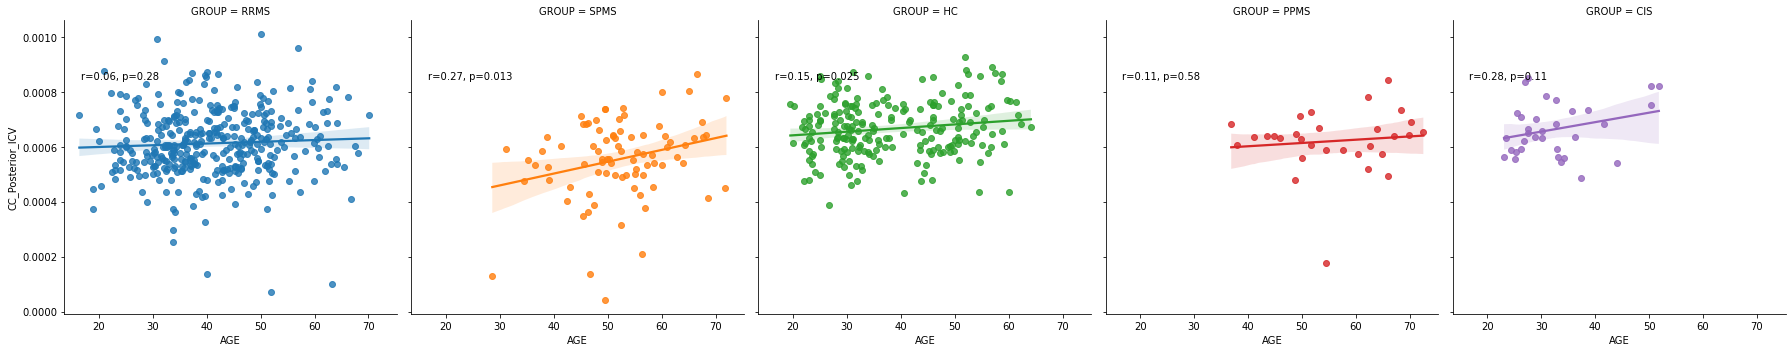

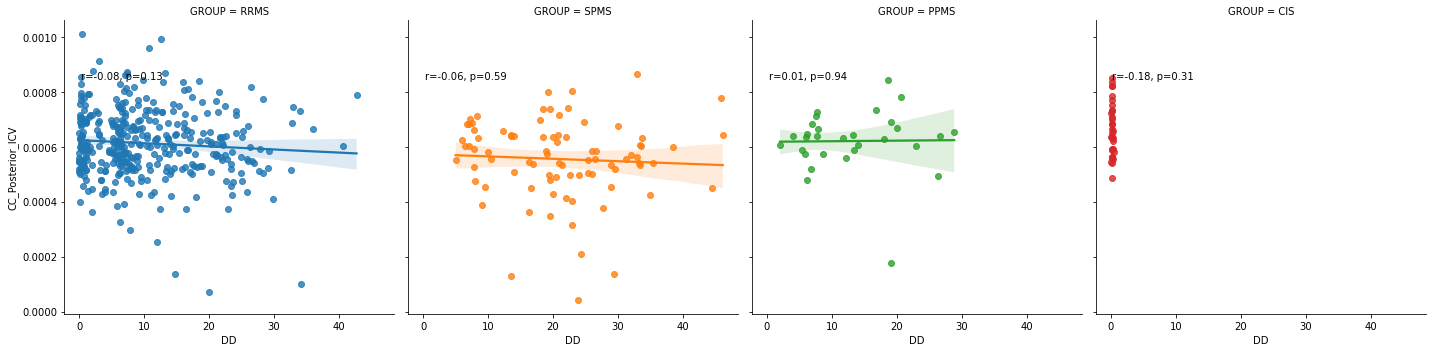

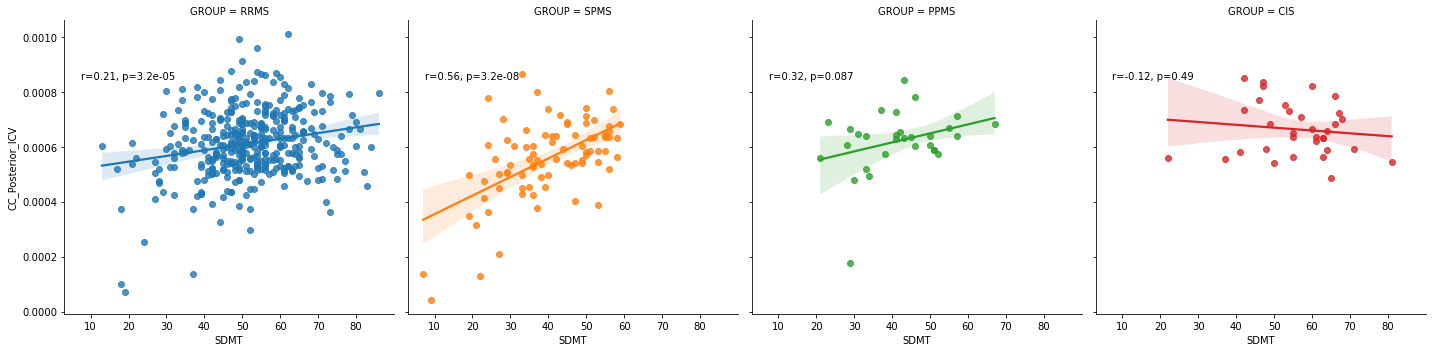

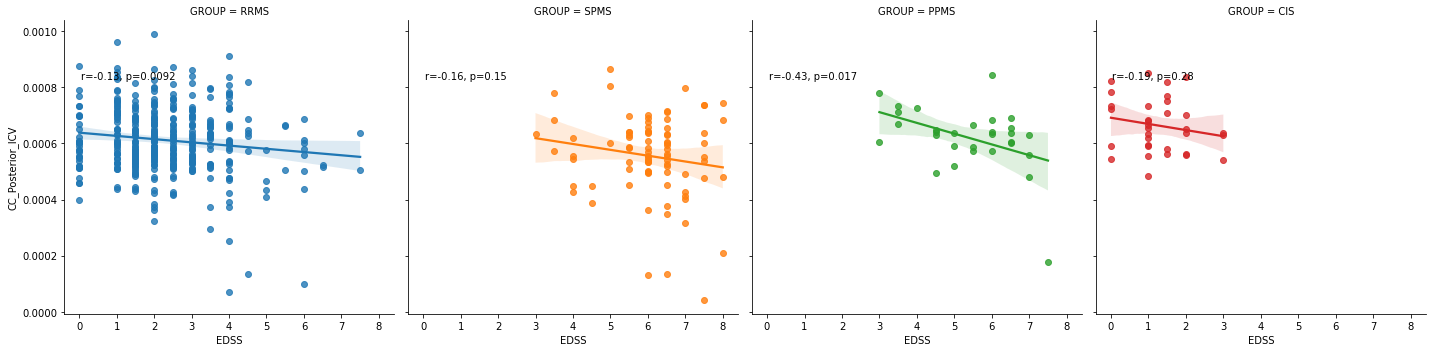

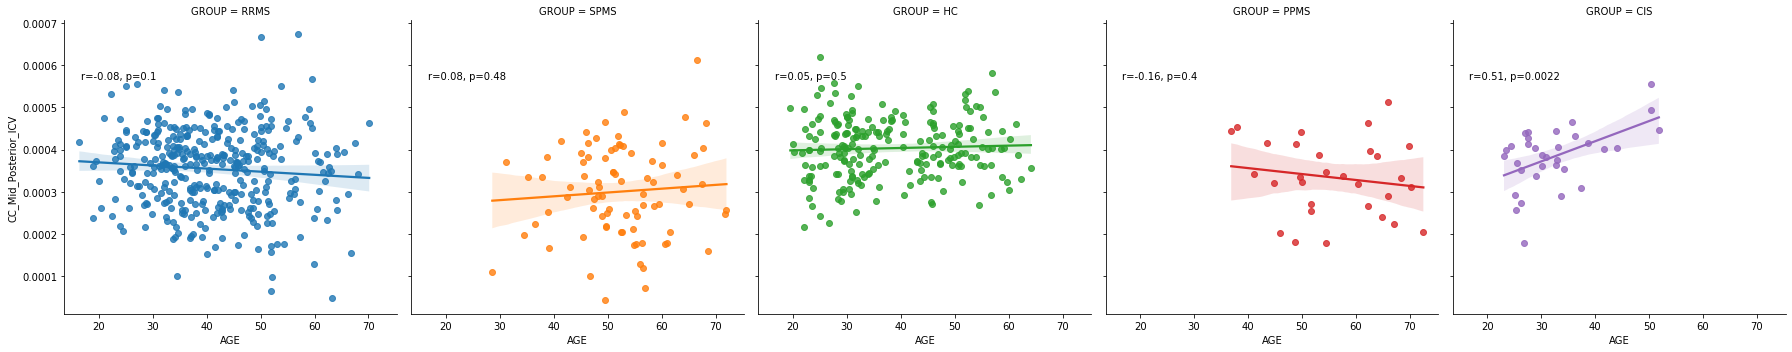

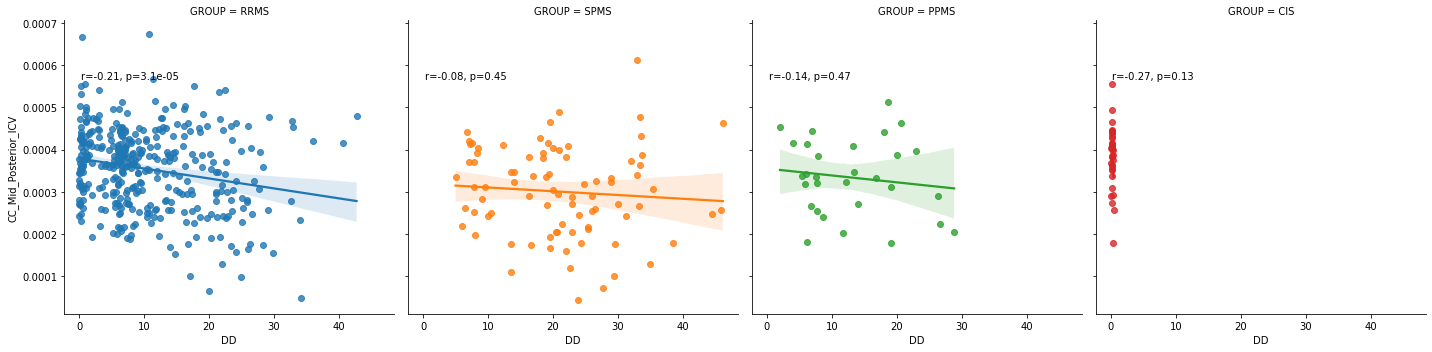

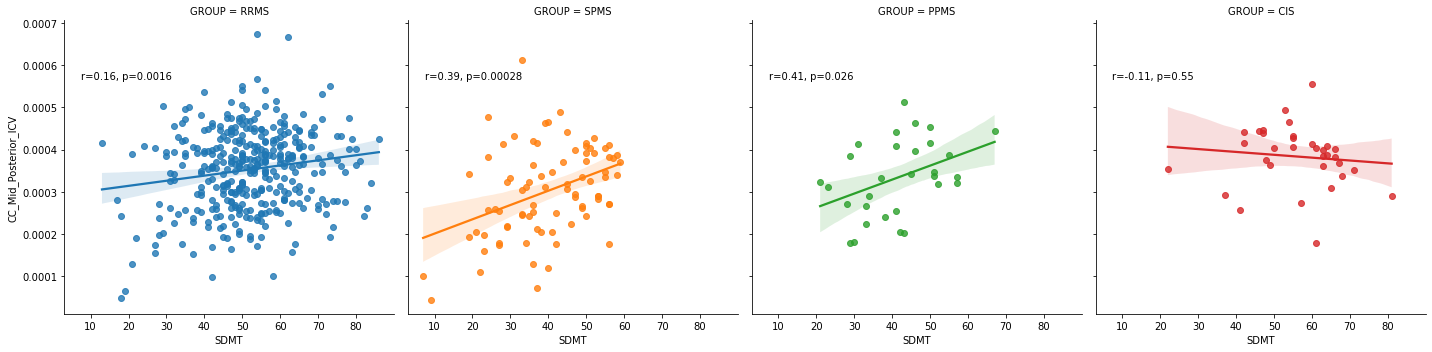

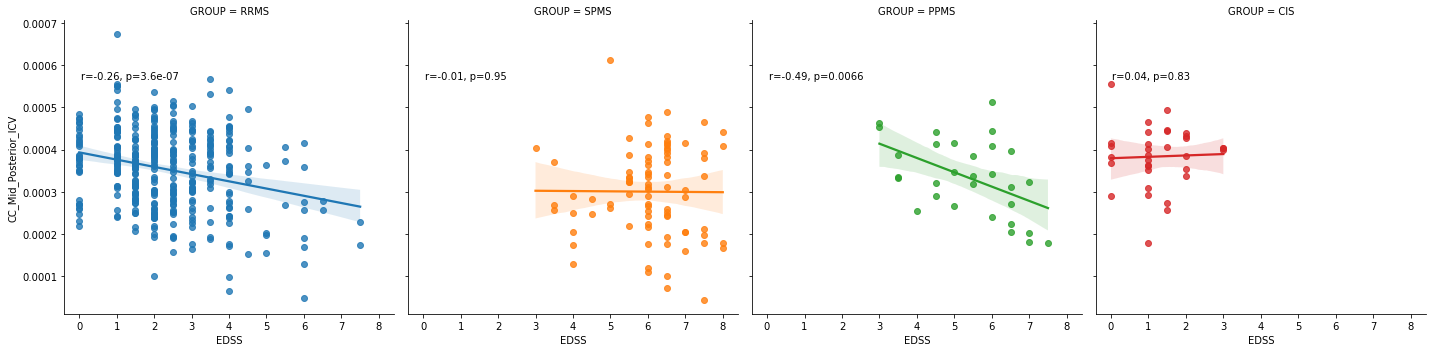

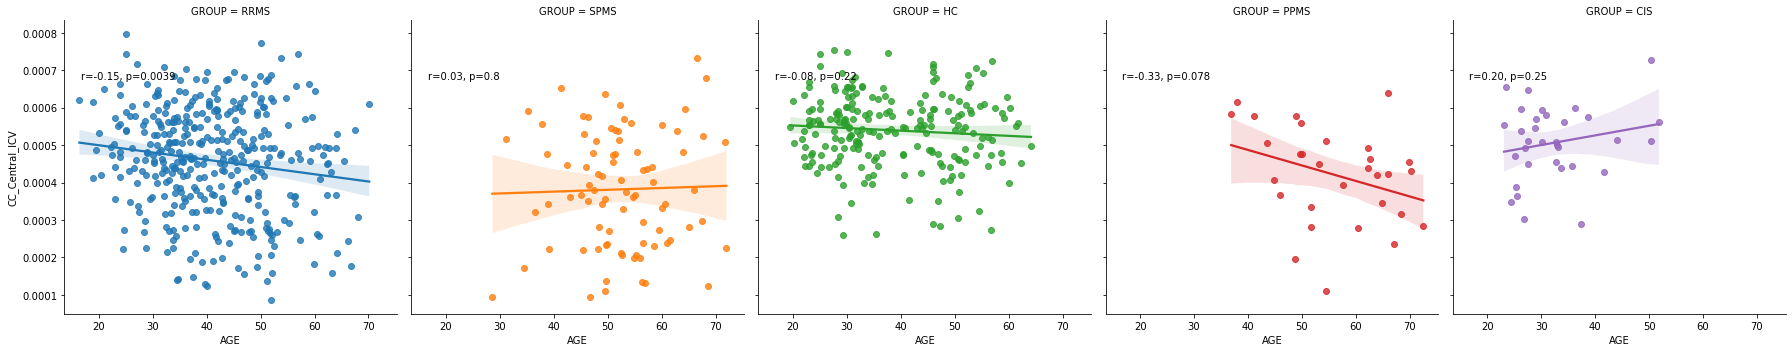

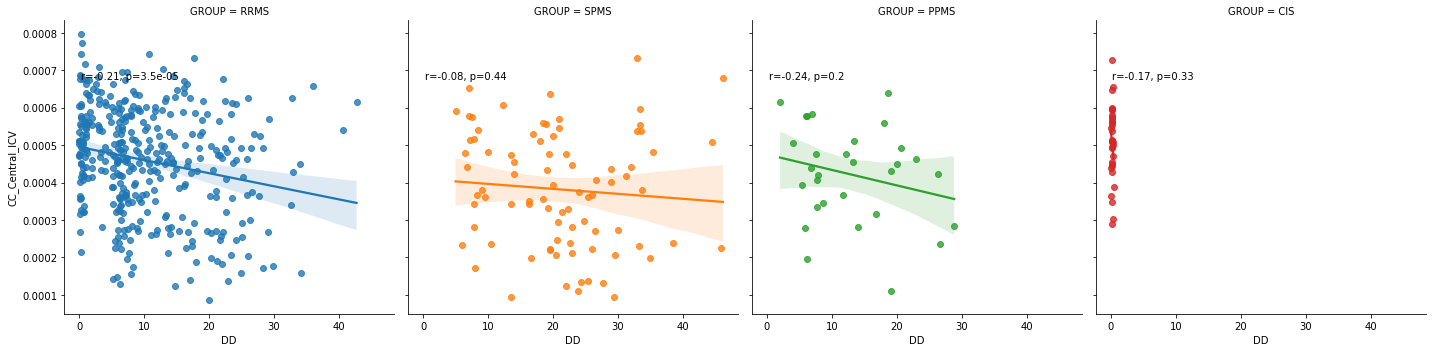

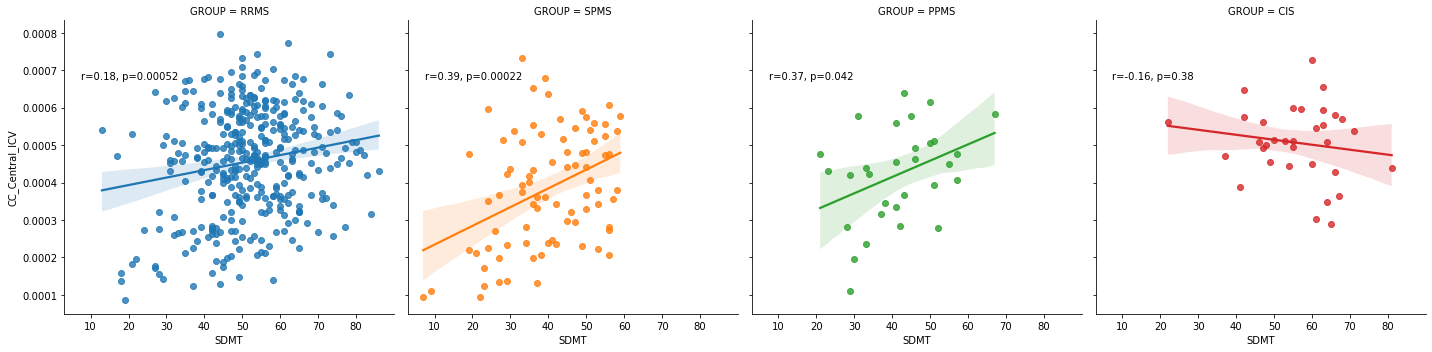

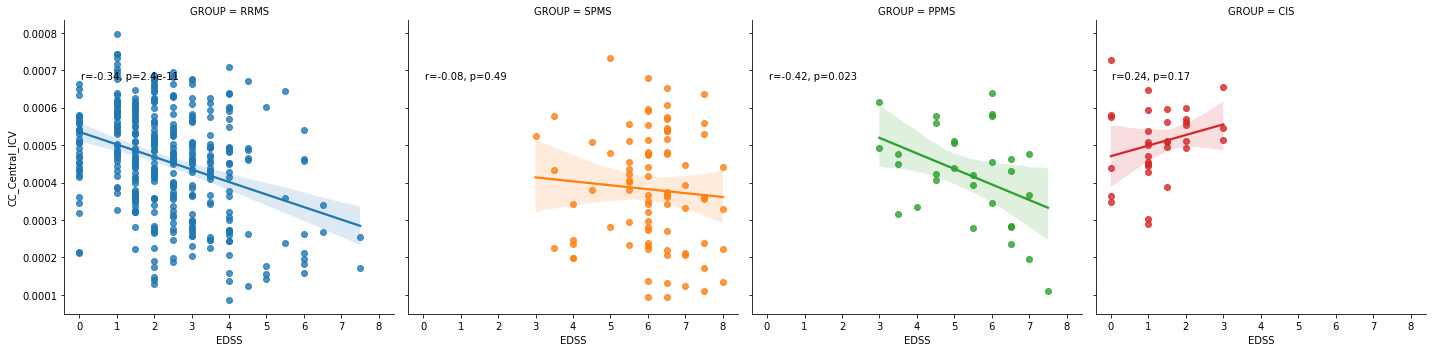

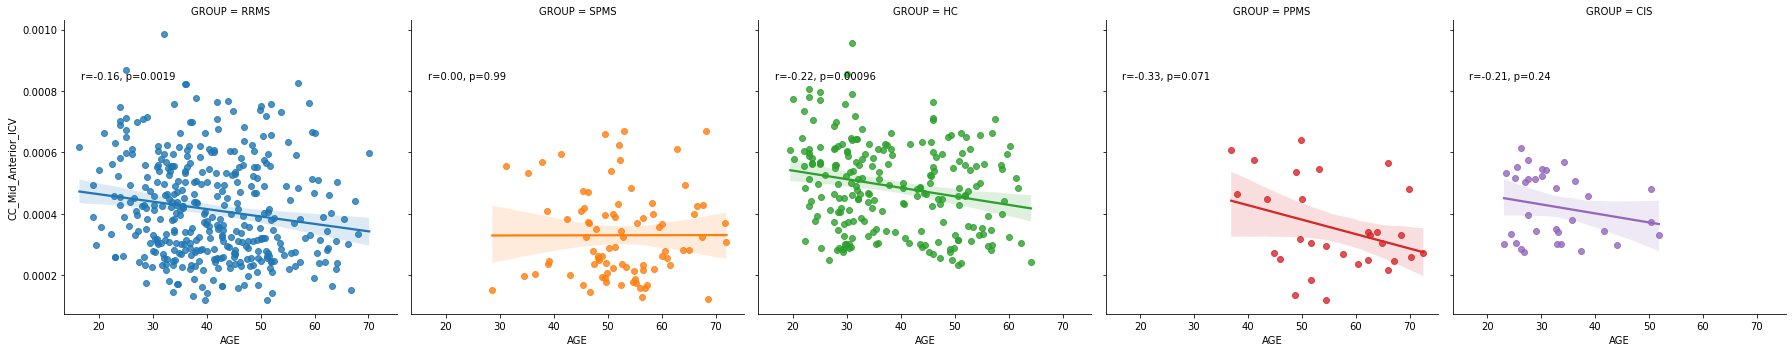

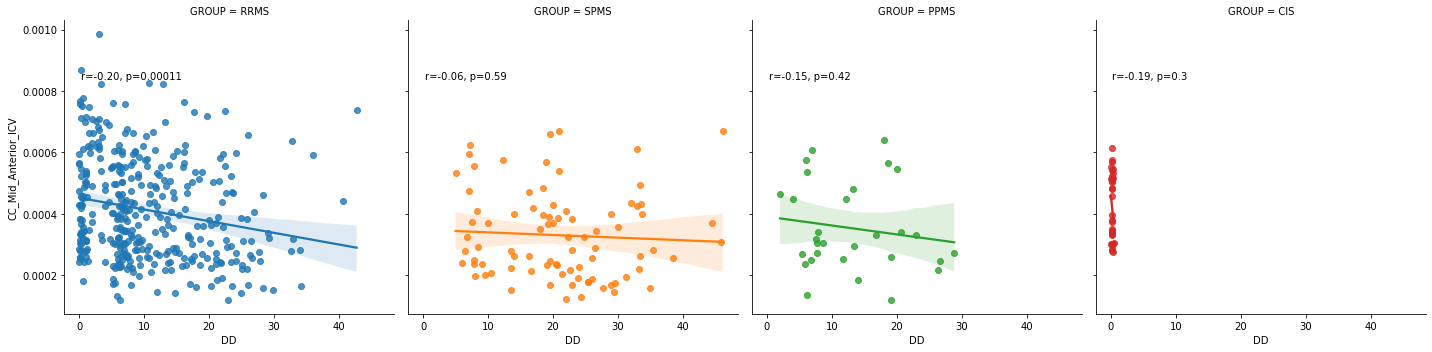

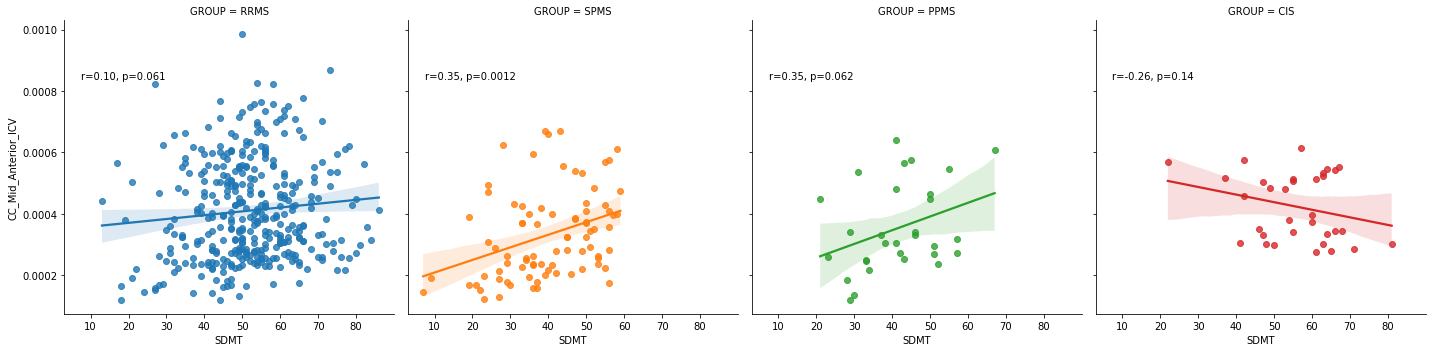

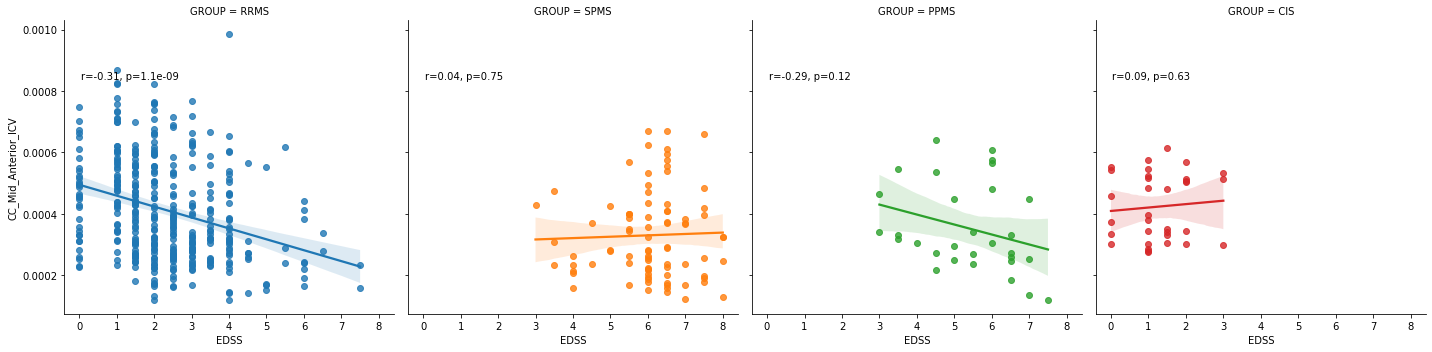

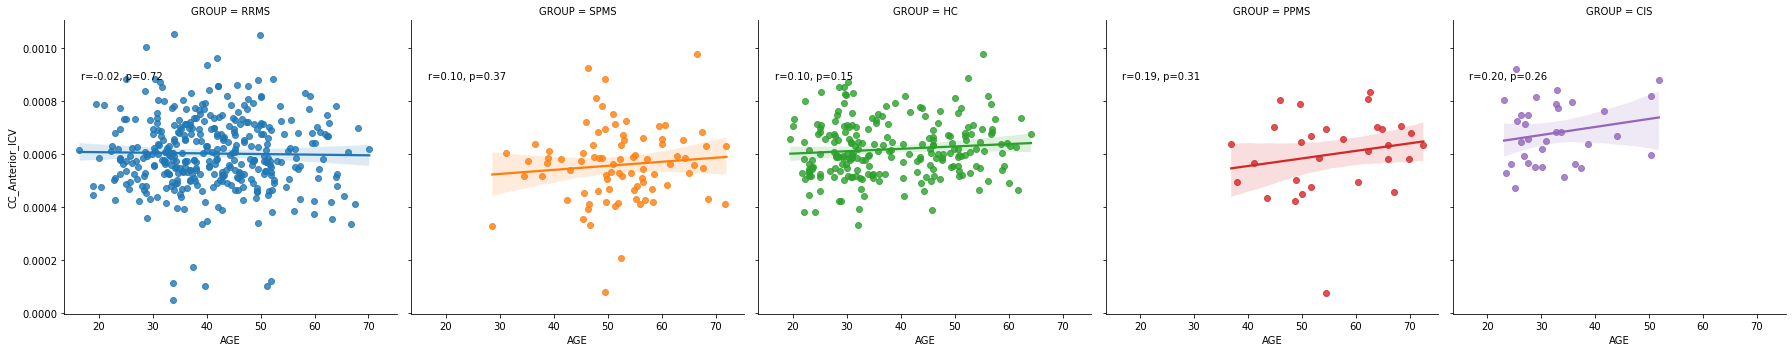

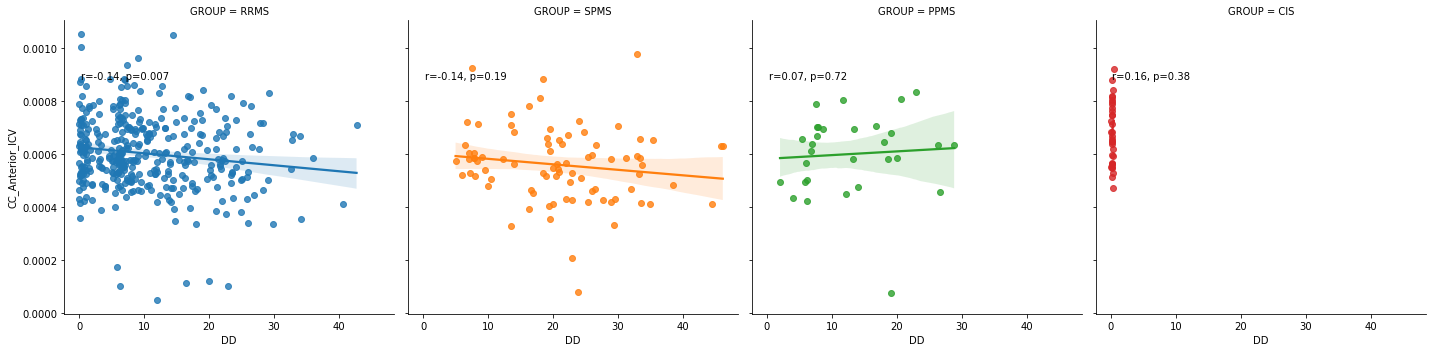

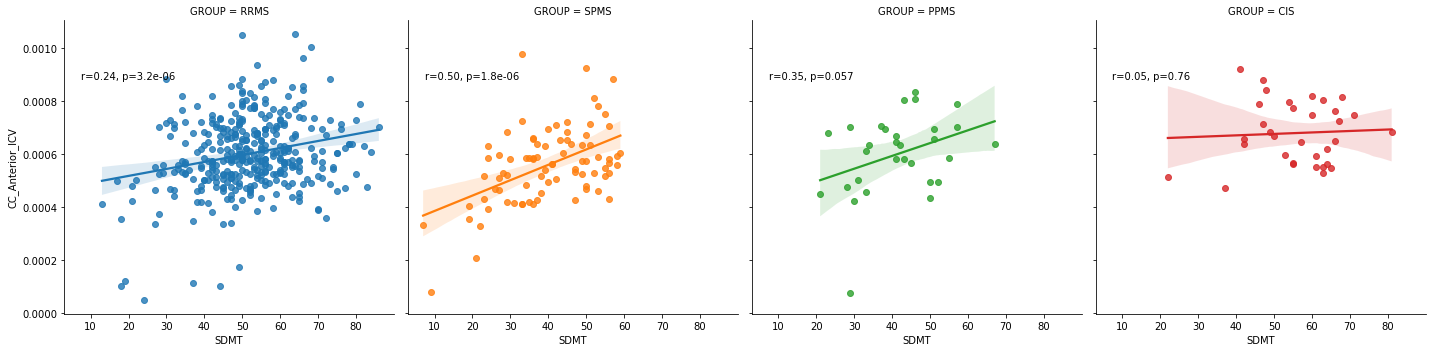

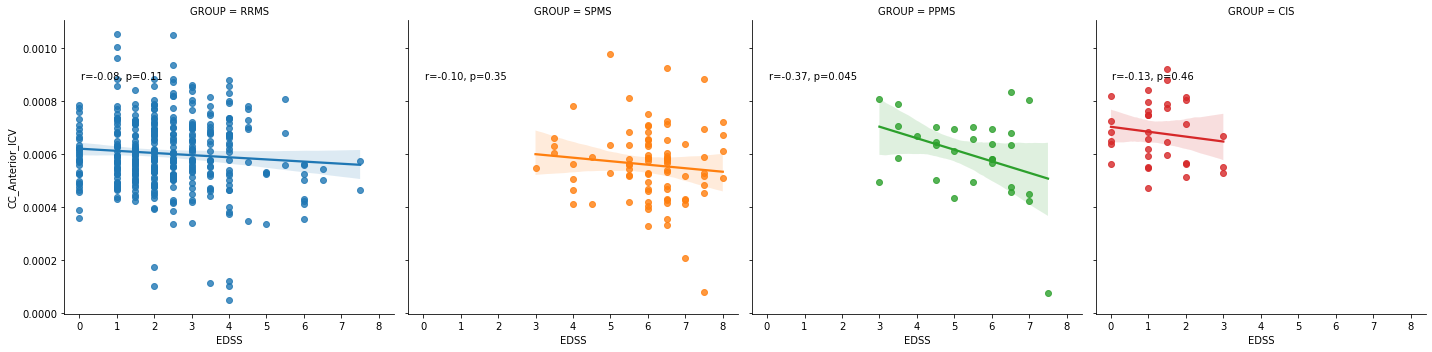

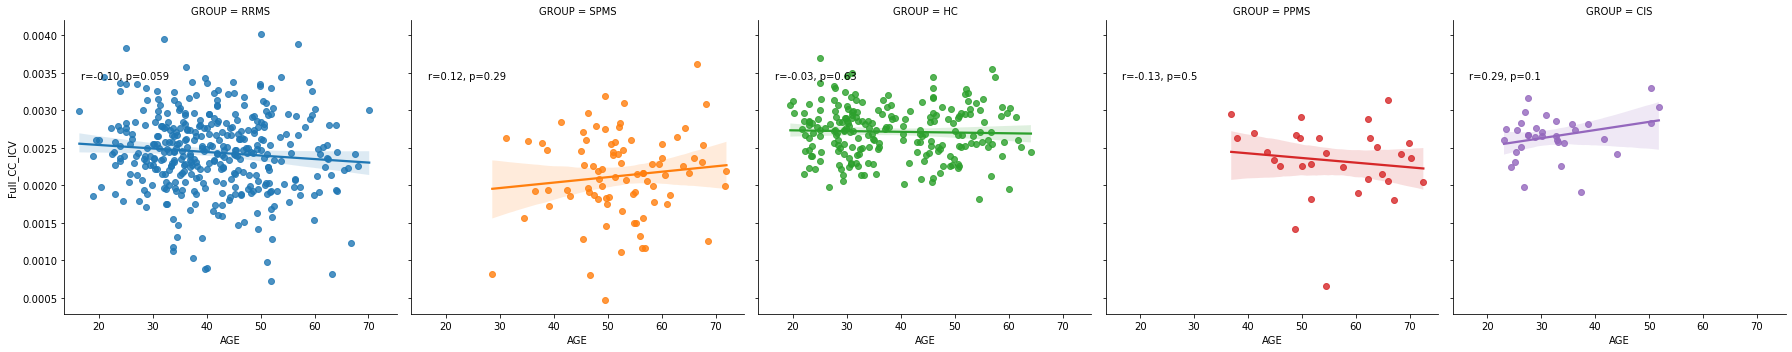

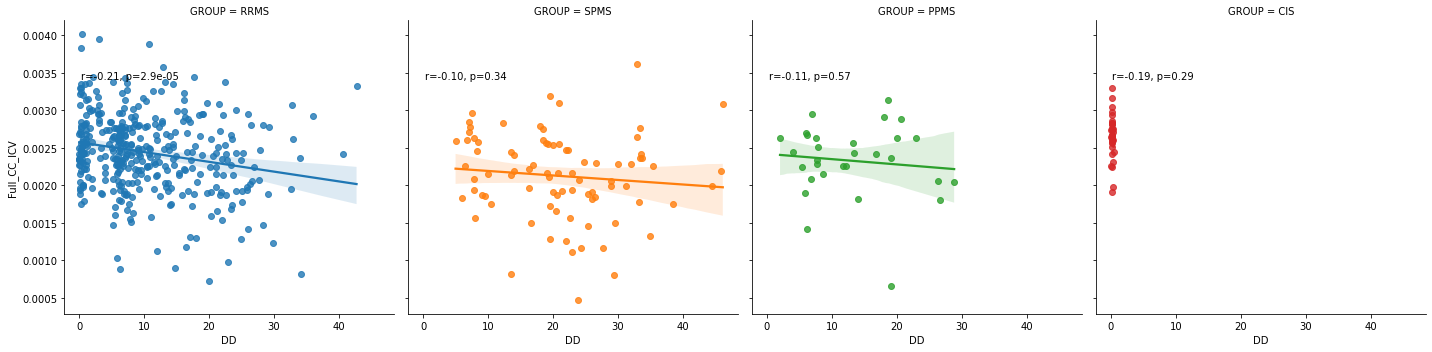

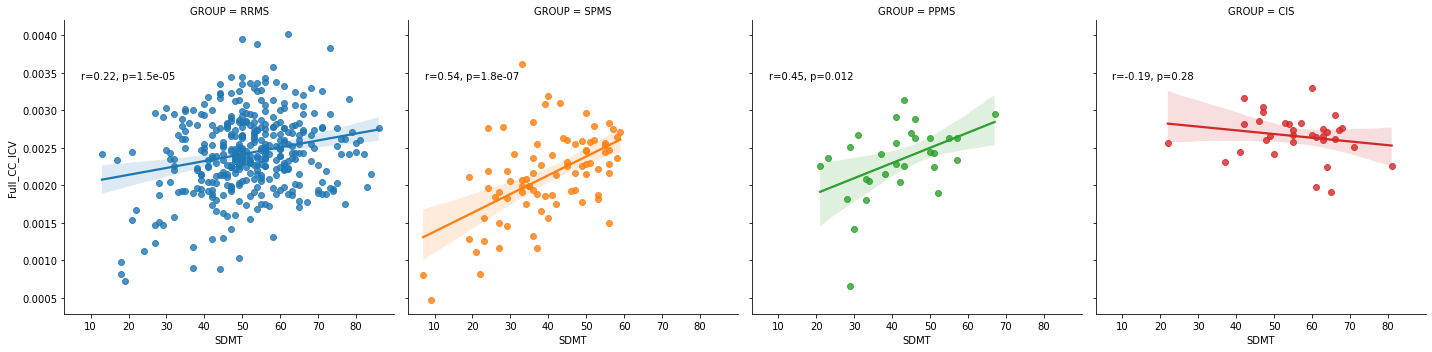

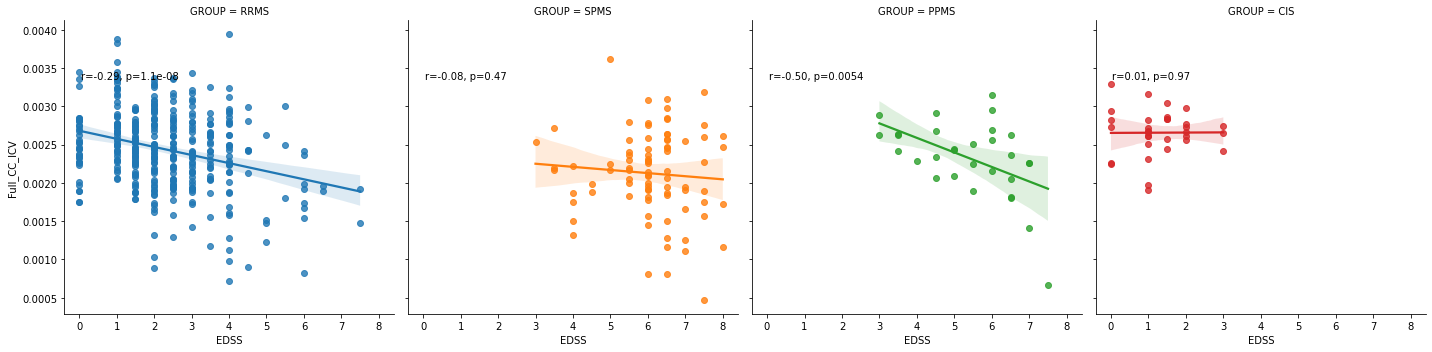

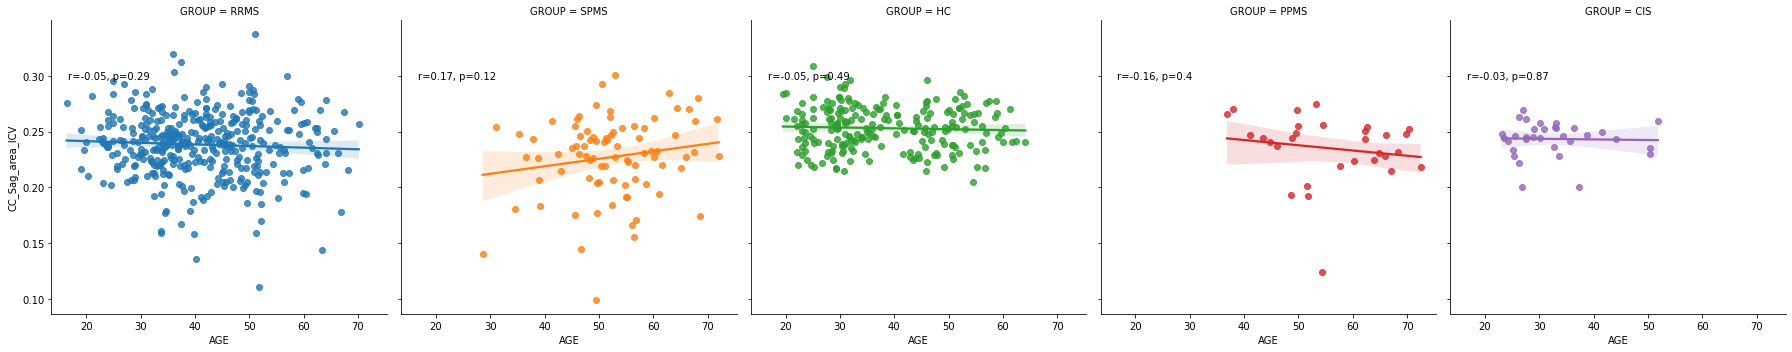

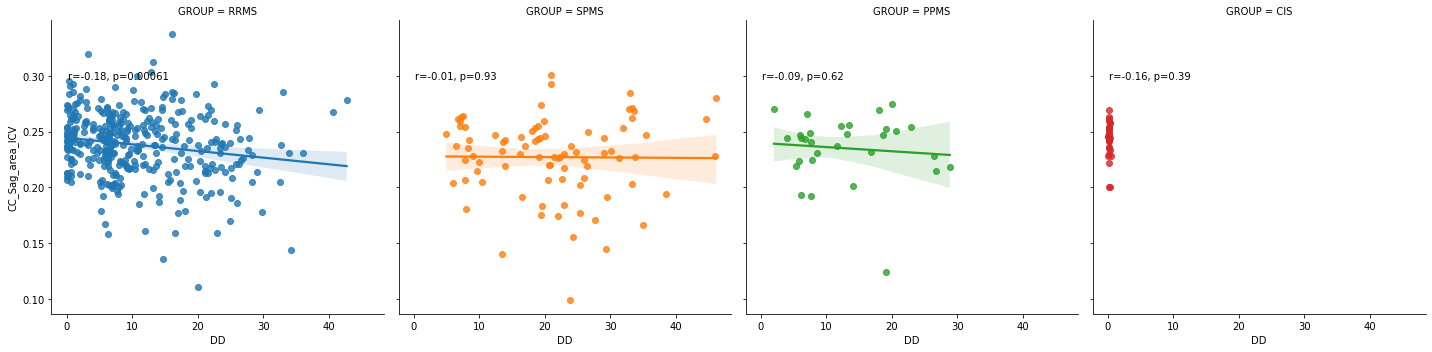

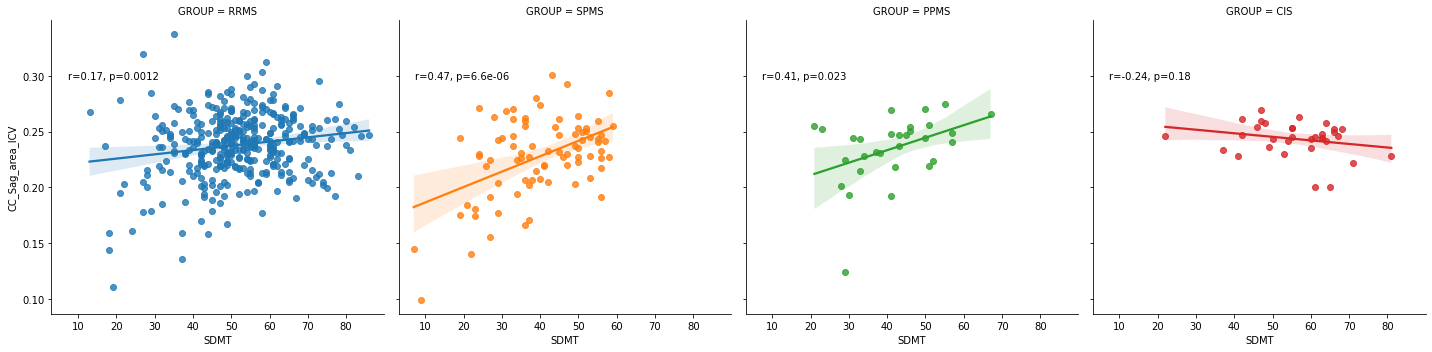

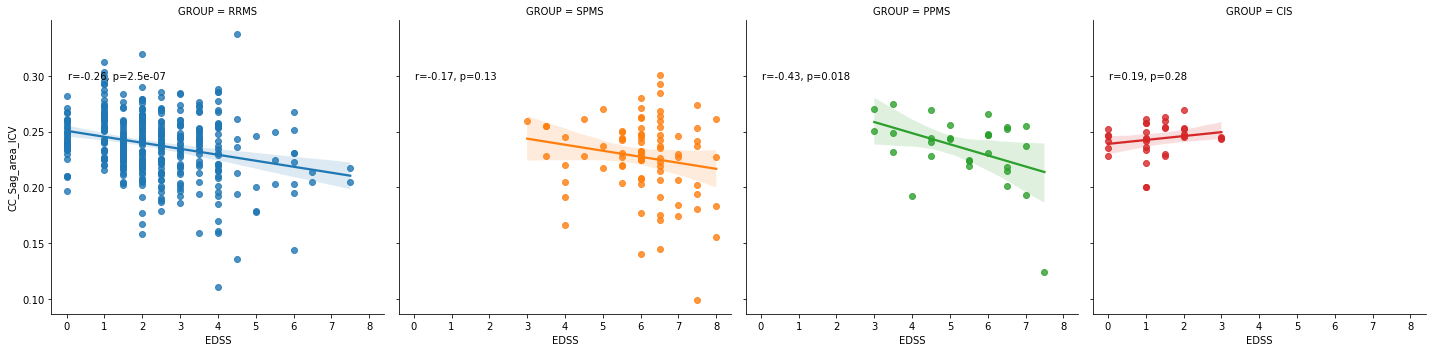

In [25]:
## REGRESSION
# Compare each CC to SDMT and EDSS. 
from scipy import stats

variable_to_plot = "Test" # needs to change every time

def annotate(data, **kws):
    r, p = stats.pearsonr(data[variable_to_plot], data[f"{cc}_ICV"])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)

list_of_values = ["CC_Posterior", "CC_Mid_Posterior", "CC_Central", "CC_Mid_Anterior", "CC_Anterior", "Full_CC", "CC_Sag_area"]
for cc in list_of_values:

    # divide by TOtal ICV and onto new column
    # df_merged[f"{cc}_ICV"] = df_merged[cc] / df_merged["EstimatedTotalIntraCranialVol"]

    for variable_to_plot in ["AGE", "DD", "SDMT", "EDSS"]:

        data_to_plot = df_merged
        if variable_to_plot in ["DD", "SDMT", "EDSS"]:
            data_to_plot = df_merged[df_merged.GROUP != "HC"].dropna(subset=[variable_to_plot])

        # AGE
        g = sns.lmplot(data=data_to_plot, x=variable_to_plot, y=f"{cc}_ICV", col="GROUP", hue="GROUP")
        g.map_dataframe(annotate)

